In [4]:
uimport warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout
from keras.applications.vgg16 import VGG16
from keras import layers

In [5]:
path_folder = "C:\\Users\\Kavya\\Downloads\\final_parkingslot\\final_code\\backend\\clf-data"
class_name = os.listdir(path_folder)
class_name

['empty', 'not_empty']

In [6]:
path_folder = "C:\\Users\\Kavya\\Downloads\\final_parkingslot\\final_code\\backend\\clf-data"
class_name = os.listdir(path_folder)
class_name.sort()
#class_name = class_name[:4] + class_name[20:23]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (224, 224))
        
        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['empty', 'not_empty']
Loading Folder -- empty  The Count of Classes ==>  0
Loading Folder -- not_empty  The Count of Classes ==>  1
---- Done ----------- 


In [7]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)
labelz

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
print(data.shape)


(6090, 224, 224, 3)


In [9]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([1., 0.], dtype=float32)

In [10]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4872, 224, 224, 3), (4872, 2), (1218, 224, 224, 3), (1218, 2))

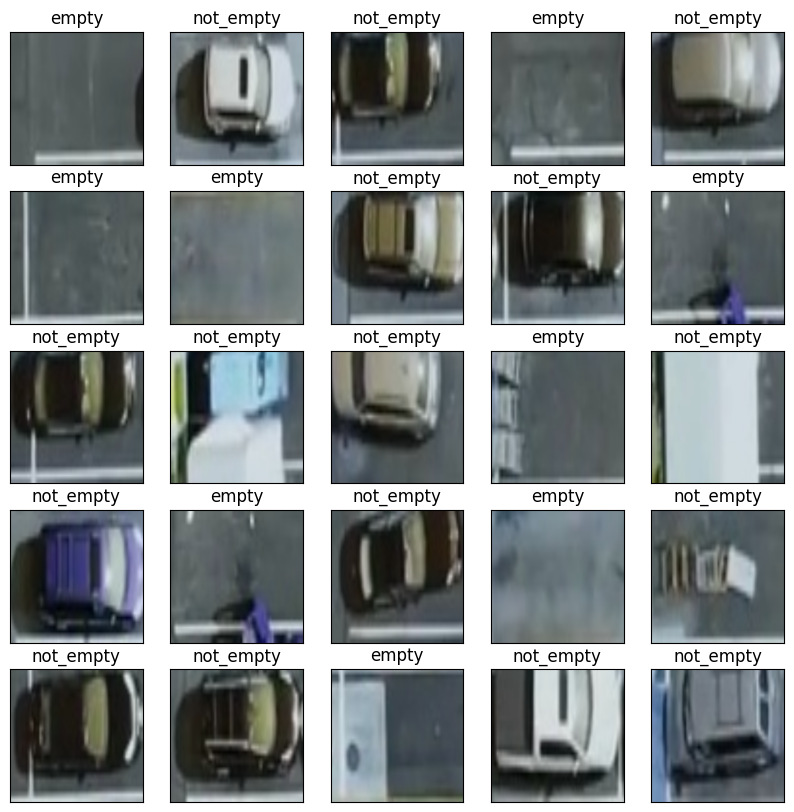

In [12]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

In [13]:
#Vgg16 = VGG16(include_top=False, input_shape= (224,224,3)) 

#Vgg16.trainable=False

In [14]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(224,224,3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(2, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 average_pooling2d (AverageP  (None, 112, 112, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 average_pooling2d_1 (Averag  (None, 56, 56, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 28, 28, 64)       0

In [15]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/5
153/153 [==============================] - 204s 1s/step - loss: 0.2466 - accuracy: 0.9009 - val_loss: 0.2779 - val_accuracy: 0.9294
Epoch 2/5
153/153 [==============================] - 167s 1s/step - loss: 0.0508 - accuracy: 0.9862 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 3/5
153/153 [==============================] - 147s 961ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.0873 - val_accuracy: 0.9672
Epoch 4/5
153/153 [==============================] - 142s 928ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 5/5
153/153 [==============================] - 158s 1s/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 4.8963e-05 - val_accuracy: 1.0000


In [16]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and have x_test and y_test
# If you have used validation_data in model.fit, you can use that directly

# Assuming 'model' is your trained model
y_pred = model.predict(x_test)

# Convert predictions to binary values (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate classification report
class_report = classification_report(y_test, y_pred_binary)

print("Classification Report:\n", class_report)


39/39 [==============================] - 10s 256ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      1.00      1.00       602

   micro avg       1.00      1.00      1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218
 samples avg       1.00      1.00      1.00      1218



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming x_train and x_test are 4D arrays (image data)
# Flatten the image data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Initialize the RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(x_train_flattened, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(x_test_flattened)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      1.00      1.00       602

   micro avg       1.00      1.00      1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218
 samples avg       1.00      1.00      1.00      1218



In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming x_train and x_test are 4D arrays (image data)
# Flatten the image data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(x_train_flattened, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(x_test_flattened)

# Generate classification report
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       616
           1       0.99      0.99      0.99       602

   micro avg       0.99      0.99      0.99      1218
   macro avg       0.99      0.99      0.99      1218
weighted avg       0.99      0.99      0.99      1218
 samples avg       0.99      0.99      0.99      1218

